Name: Aditya Kamath

Roll no.: C021

Semester: VI

Program: B.Tech

Branch: EXTC

Date of performance: 22 / 01 / 2021

Date of Submission: 22 / 01 /2 021

Experiment Number: 3

Colab Link: https://colab.research.google.com/drive/1BmvoVg-CdlXWZ9TpYSyvQhkczPuYUHyp?usp=sharing


---



Aim: 

a)	To  write a program in PYTHON to plot histogram of an image.

b)	To plot histogram of different images and classify them as low contrast, high contrast, dark and bright images.

c)	To  write a program in PYTHON to perform histogram stretching on an image.

d)	To write a program in PYTHON to perform histogram equalization.


# Theory

### Histogram:

A histogram is a graph. The x axis contains event (pixel intensity) whose frequency you have to count. The y axis contains frequency.


There are two methods of enhancing contrast namely histogram stretching and histogram equalization.


---

### Histogram stretching:

Modified pixel value is given by
s=[(s_max-s_min⁡ )/(r_max-r_min⁡  )] *(r-r_min⁡  ) +  s_min 
where 

s_max= max grey level of the output image

s_min = min grey level of the output image

r_max= max grey level of the input image

r_min = min grey level of the input image


---


### Histogram equalization:

Steps to perform histogram equalization

Plot histogram of the original image

1.   Calculate PDF
2.   Calculate CDF
3.   Perform mapping to get the output image
4.   Plot the histogram of the output image.


# Import Packages

In [ ]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
from skimage import io

# **1. Histogram for any given image**

512 512
<class 'numpy.ndarray'>


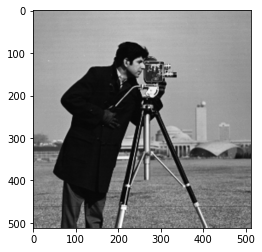

In [ ]:
#Read the original image and know its properites
img1= cv2.imread('/content/cameraman.tif',0)                                   
m,n= img1.shape
print(m,n)
print(type(img1))
plt.imshow(img1,cmap='gray')

Optimizing the code for histogram

Code 1:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app


CPU times: user 1min 51s, sys: 12.6 ms, total: 1min 51s
Wall time: 1min 51s


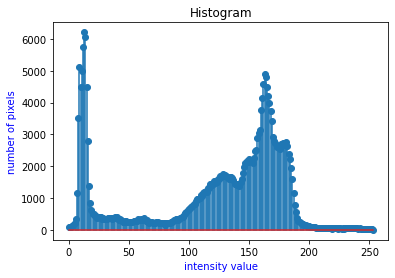

In [ ]:
# To plot Histogram of the given image
%%time
L= img1.max()
x = []
y = []

for k in range(0,L-1):
  c = 0
  for i in range(m):
    for j in range(n):
      if img1[i,j] == k:
        c= c+1
  y.append(c)
  x.append(k)

plt.stem(x,y)               
plt.xlabel('intensity value',color='blue')
plt.ylabel('number of pixels',color = 'blue')
plt.title('Histogram')

code 2:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]


CPU times: user 1min 45s, sys: 7.72 ms, total: 1min 45s
Wall time: 1min 45s


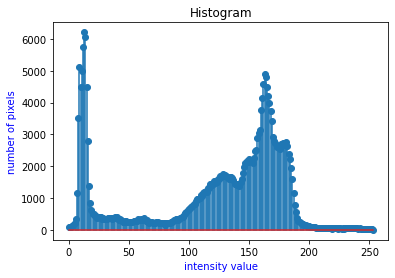

In [ ]:
# To plot Histogram of the given image
%%time
L= img1.max()
x = []
y = []

for k in range(0,L-1):
  c = 0
  for i in img1.flatten():
    if i == k:
      c= c+1
  y.append(c)
  x.append(k)

plt.stem(x,y)               
plt.xlabel('intensity value',color='blue')
plt.ylabel('number of pixels',color = 'blue')
plt.title('Histogram')

code 3:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]


CPU times: user 2min 3s, sys: 161 ms, total: 2min 3s
Wall time: 2min 3s


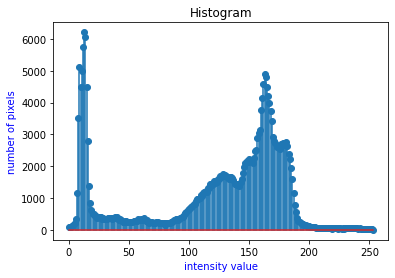

In [ ]:
# To plot Histogram of the given image
%%time
L= img1.max()
x = []
y = []

for k in range(0,L-1):
  c = 0
  for i, j in [(i,j) for i in range(m) for j in range(n)]:
    if img1[i,j] == k:
      c= c+1
  y.append(c)
  x.append(k)

plt.stem(x,y)               
plt.xlabel('intensity value',color='blue')
plt.ylabel('number of pixels',color = 'blue')
plt.title('Histogram')           

From the above 3, we can see that time required for processing in 2. is lowest ie 1 min 45 sec. 

so we can use that method to solve further.

# 2. Histogram for 4 images to be compared
histogram of different images and classify them as low contrast, high contrast, dark and bright images



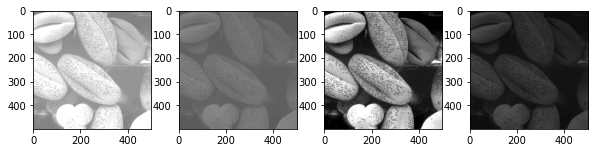

In [ ]:
# Reading the 4 images images 

im1= cv2.imread('/content/Fig0320(1)(top_left).tif',0)                                   
m1,n1= im1.shape
im2= cv2.imread('/content/Fig0320(2)(2nd_from_top).tif',0)                                   
m2,n2= im2.shape
im3= cv2.imread('/content/Fig0320(3)(third_from_top).tif',0)                                   
m3,n3= im3.shape
im4= cv2.imread('/content/Fig0320(4)(bottom_left).tif',0)                                   
m4,n4= im4.shape

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(4,4, 1)
plt.imshow(im1,cmap='gray',vmin = 0,vmax=255)

ax = fig.add_subplot(4,4, 2)
plt.imshow(im2,cmap='gray',vmin = 0,vmax=255)

ax = fig.add_subplot(4,4, 3)
plt.imshow(im3,cmap='gray',vmin = 0,vmax=255)

ax = fig.add_subplot(4,4, 4)
plt.imshow(im4,cmap='gray',vmin = 0,vmax=255)


In [ ]:
# histogram using self made function

def hist(img):
  [m,n] = img.shape
  L= img.max()
  x = []
  y = []

  for k in range(0,L-1):
    c = 0
    for i in range(m):
      for j in range(n):
        if img[i,j] == k:
          c= c+1
    y.append(c)
    x.append(k)
  return (x,y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


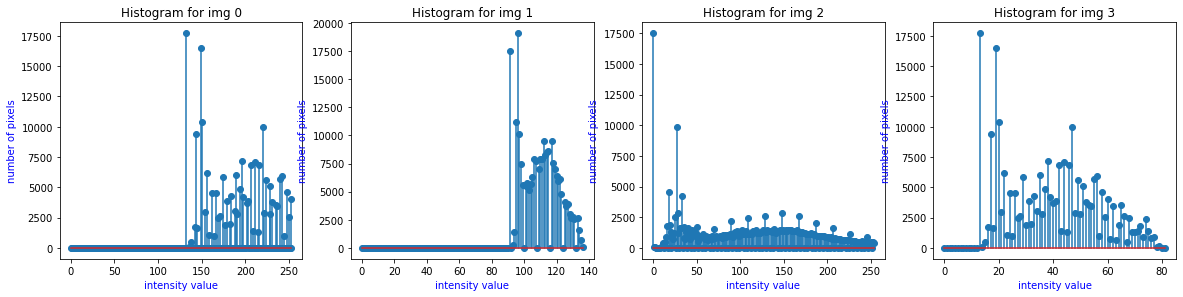

In [ ]:
# Plot all the histograms for the defined images
im = [im1,im2,im3,im4]
fig = plt.figure(figsize=(20,20))

for i in range(len(im)):
  ax = fig.add_subplot(4,4,i+1)
  [x,y] = hist(im[i])
  plt.stem(x,y)               
  plt.xlabel('intensity value',color='blue')
  plt.ylabel('number of pixels',color = 'blue')
  plt.title('Histogram for img {}'.format(i))

# 3. Histogram strecthing

500 500


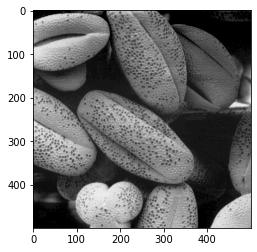

In [ ]:
# Select image on which we need to perform histogram streching
img_new= cv2.imread('/content/Fig0320(4)(bottom_left).tif',0)                                   
m,n= img_new.shape
print(m,n)
plt.imshow(img_new,cmap='gray')

In [ ]:
#Histogram strecthing
import numpy as np

rmax = np.max(img_new)
rmin = np.min(img_new)
smax = 255
smin = 0
c = (smax - smin)//(rmax-rmin)

imgnew = np.zeros((m,n), dtype=np.int)

for i in range(m):
  for j in range(n):
    imgnew[i,j] = c*(img_new[i,j]-rmin)+smin
cv2.imwrite('/content/Fig0320(5)(new).tif',imgnew)

True

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':


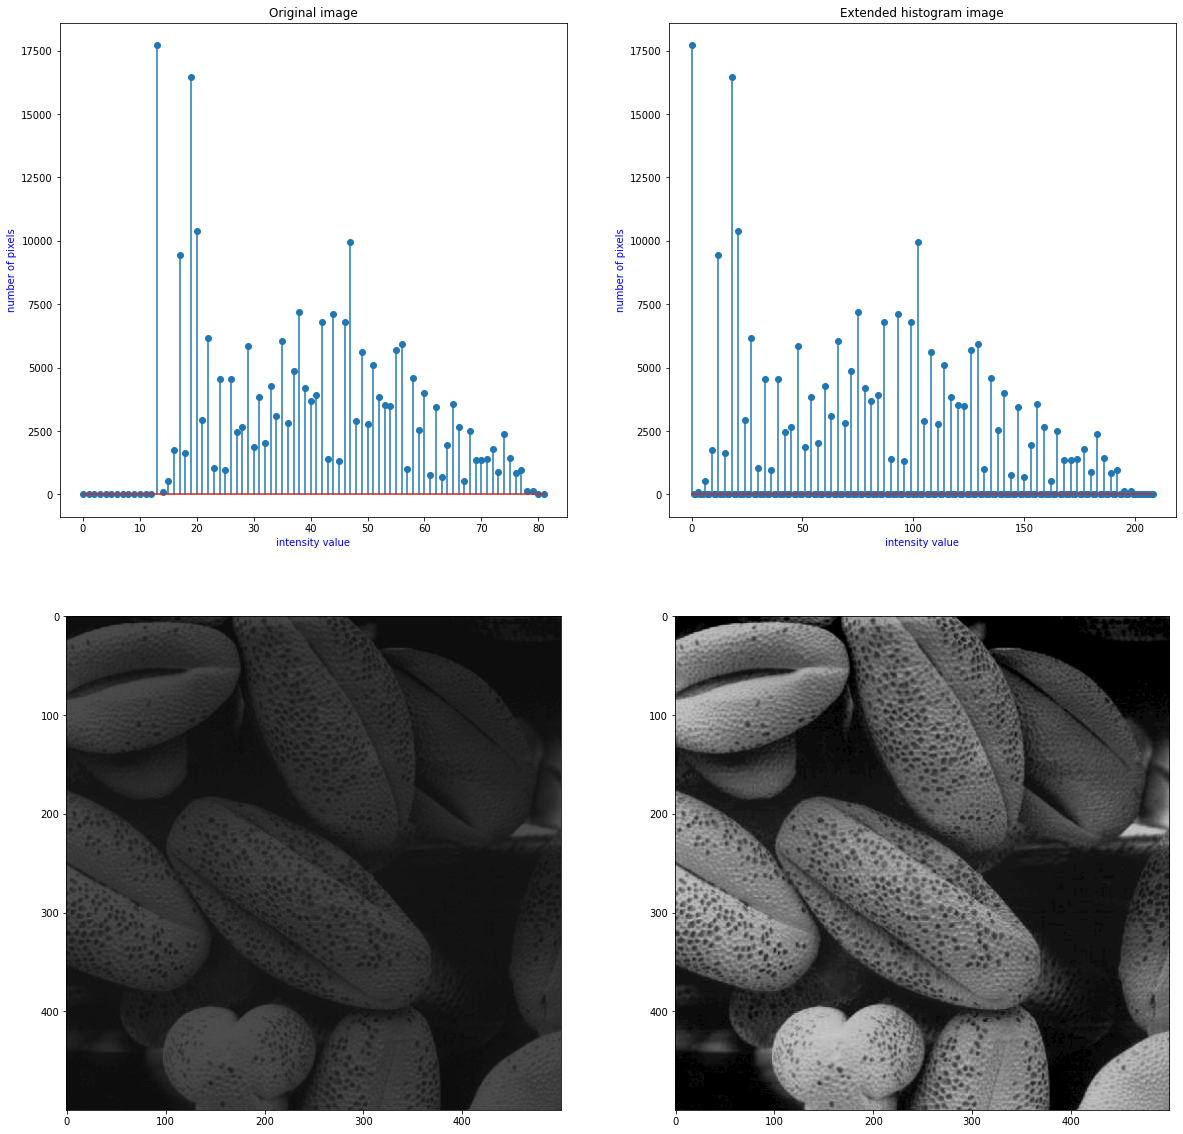

In [ ]:
fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(2,2,1)
[x,y] = hist(img_new)
plt.stem(x,y)               
plt.xlabel('intensity value',color='blue')
plt.ylabel('number of pixels',color = 'blue')
plt.title('Original image')

ax = fig.add_subplot(2,2,2)
[x,y] = hist(imgnew)
plt.stem(x,y)               
plt.xlabel('intensity value',color='blue')
plt.ylabel('number of pixels',color = 'blue')
plt.title('Extended histogram image')

ax = fig.add_subplot(2,2,3)
plt.imshow(img_new, cmap = 'gray', vmin=0, vmax=255)

ax = fig.add_subplot(2,2,4)
plt.imshow(imgnew,cmap='gray',vmin =0,vmax=255)

# Histogram Equalisation

512 512


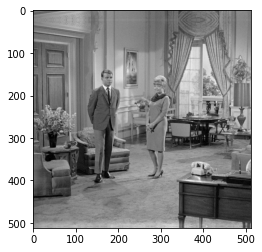

In [ ]:
# Select image on which we need to perform histogram streching
img_hist= cv2.imread('/content/livingroom.tif',0)                                   
m,n= img_hist.shape
print(m,n)
plt.imshow(img_hist,cmap='gray')

(array([1.1810e+03, 1.3730e+03, 2.1680e+03, 1.9220e+03, 1.9530e+03,
        2.2460e+03, 2.1700e+03, 2.4930e+03, 2.5240e+03, 3.9110e+03,
        5.5240e+03, 4.3330e+03, 4.4420e+03, 3.4570e+03, 4.1210e+03,
        4.6200e+03, 5.0890e+03, 5.2690e+03, 6.1490e+03, 6.0550e+03,
        1.1591e+04, 1.2482e+04, 1.3794e+04, 1.3605e+04, 1.1546e+04,
        1.3285e+04, 1.5749e+04, 1.5118e+04, 1.2942e+04, 1.1643e+04,
        1.1836e+04, 9.1940e+03, 7.7450e+03, 5.9210e+03, 4.8860e+03,
        4.0850e+03, 2.6600e+03, 2.8360e+03, 2.5940e+03, 1.6750e+03,
        1.4070e+03, 1.1370e+03, 1.4780e+03, 1.1340e+03, 4.6300e+02,
        2.0700e+02, 6.0000e+01, 3.3000e+01, 2.3000e+01, 1.5000e+01]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9

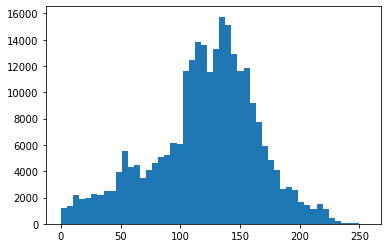

In [ ]:
# convert our image into a numpy array
img_hist = np.asarray(img_hist)

# put pixels in a 1D array by flattening out img array
flat = img_hist.flatten()

# show the histogram
plt.hist(flat, histtype='stepfilled',bins=50)

In [ ]:
# create our own histogram function
def get_histogram(image, bins):
    # array with size of bins, set to zeros
    histogram = np.zeros(bins)
    
    # loop through pixels and sum up counts of pixels
    for pixel in image:
        histogram[pixel] += 1
    
    # return our final result
    return histogram

# execute our histogram function
hist = get_histogram(flat, 256)

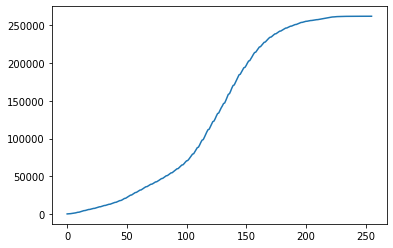

In [ ]:
# create our cumulative sum function
def cumsum(a):
    a = iter(a)
    b = [next(a)]
    for i in a:
        b.append(b[-1] + i)
    return np.array(b)

# execute the fn
cs = cumsum(hist)

# display the result
plt.plot(cs)

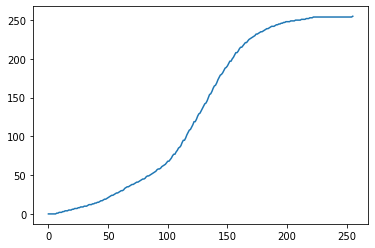

In [ ]:

# numerator & denomenator
nj = (cs - cs.min()) * 255
N = cs.max() - cs.min()

# re-normalize the cumsum
cs = nj / N

# cast it back to uint8 since we can't use floating point values in images
cs = cs.astype('uint8')

plt.plot(cs)

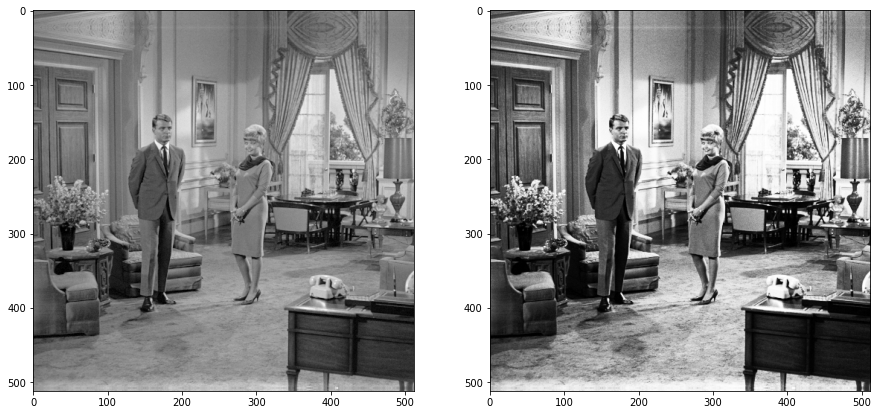

In [ ]:
# get the value from cumulative sum for every index in flat, and set that as img_new
img_new = cs[flat]

# put array back into original shape since we flattened it
img_new = np.reshape(img_new, img_hist.shape)

# set up side-by-side image display
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(img_hist, cmap='gray')

# display the new image
fig.add_subplot(1,2,2)
plt.imshow(img_new, cmap='gray')

plt.show(block=True)

Cross Check using In built Functions

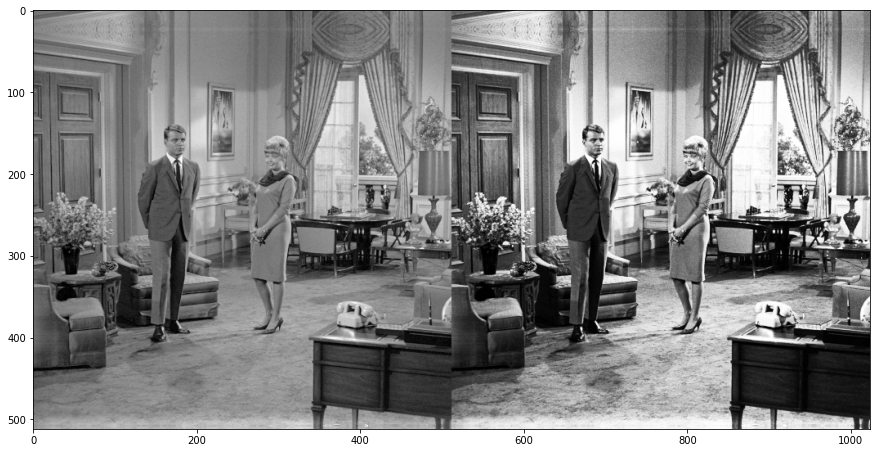

In [ ]:
img = cv2.imread('/content/livingroom.tif',0)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
cv2.imwrite('res.png',res)
plt.figure(figsize = (15,15))
plt.imshow(res, cmap='gray',vmin=0, vmax=255)

# **Conclusion:**

We successfully performed various operations on a set of images and learnt how to Obtain and Plot:

a) Histogram of Image(using for loop/ self built function)

b) Histogram of Multiple Image and classify them as low contrast, high contrast, dark and bright images.

c) Histogram stretching on an image.



1.   We tried to optimise the hist function and determine which one will take the least time to process.

2.   We plot histogram for all the 4 images and could make inferences.

3.   We applied streching on one of the images and got the new image.


# **Extras**



1.   Log Transform
2.   Power Law



Log Transform

512 512


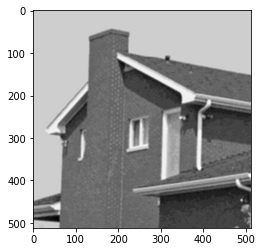

In [ ]:
#Read the image
img = cv2.imread('/content/house.tif',0)
[m1,n1]= img.shape
print(m1,n1)
plt.imshow(img,cmap='gray')

Text(0.5, 0, 'Image with log transform')

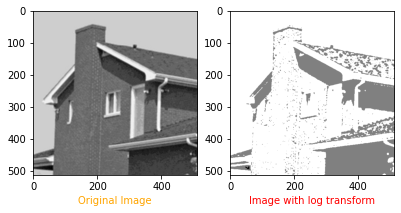

In [ ]:
#
img1= np.zeros((m1,n1), dtype= np.int) 
for i in range(m1):
  for j in range(n1):
    img1[i,j] = math.log(img[i,j]+1,10)

#Plot The Images
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,3, 1)
plt.imshow(img,cmap='gray')
plt.xlabel("Original Image",color = 'orange')

ax = fig.add_subplot(2,3, 2)
plt.imshow(img1,cmap='gray')
plt.xlabel("Image with log transform",color = 'r')

Power Law

976 746


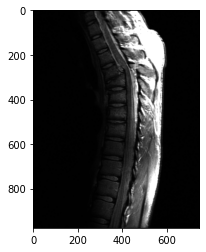

In [ ]:
#Read the image
img_new = cv2.imread('/content/Fig0308(a)(fractured_spine).tif',0)
[m2,n2]= img_new.shape
print(m2,n2)
plt.imshow(img_new,cmap='gray')

Enter value of gamma: 0.5


Text(0.5, 0, 'Image with power law transform')

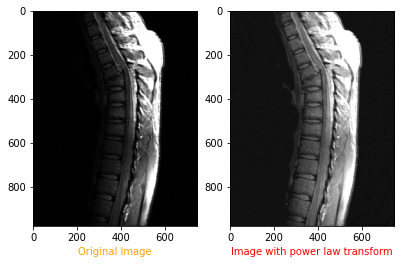

In [ ]:
#Creating a Power Law transform image of the  image
g = float(input("Enter value of gamma: "))

img2= np.zeros((m2,n2), dtype= np.int) 
for i in range(m2):
  for j in range(n2):
    img2[i,j] = math.pow(img_new[i,j],g)

#Plot The Images
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,3, 1)
plt.imshow(img_new,cmap='gray')
plt.xlabel("Original Image",color = 'orange')

ax = fig.add_subplot(2,3, 2)
plt.imshow(img2,cmap='gray')
plt.xlabel("Image with power law transform",color = 'r')

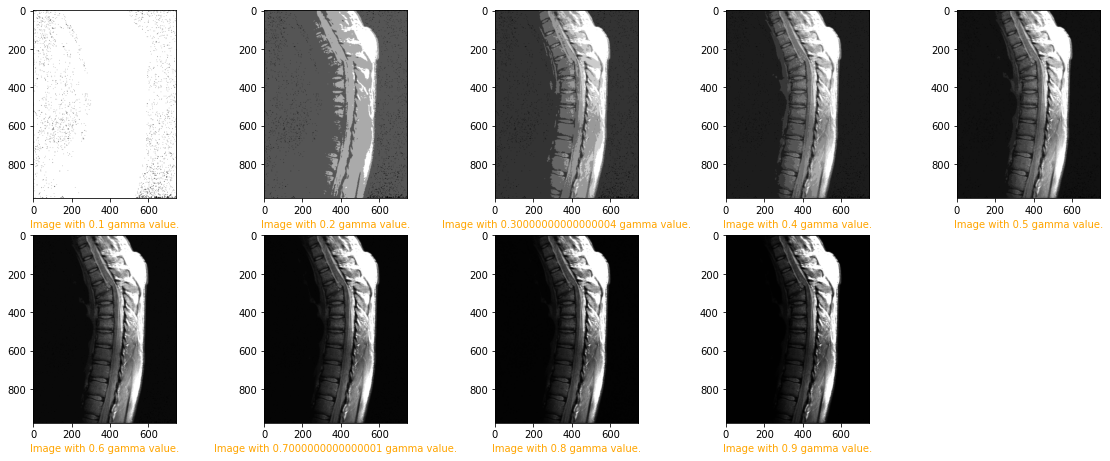

In [ ]:
fig = plt.figure(figsize=(20,20))
h = 1
for g in np.arange(0.1,1,0.1):
  img2= np.zeros((m2,n2), dtype= np.int) 
  for i in range(m2):
    for j in range(n2):
      img2[i,j] = math.pow(img_new[i,j],g)

#Plot The Images
  ax = fig.add_subplot(5,5,h)
  plt.imshow(img2,cmap='gray')
  plt.xlabel("Image with {} gamma value.".format(g),color = 'orange')
  h = h+1